# A crash course on NumPy for images

Manipulating Arrays:

In [1]:
from skimage import data
camera = data.camera()
type(camera)

numpy.ndarray

Retrieving Geometry of Image and Number of Pixels:

In [3]:
camera.shape

(512, 512)

In [4]:
camera.size

262144

Getting Statistics of Image Intensity Values:

In [5]:
camera.min(), camera.max()

(0, 255)

In [6]:
camera.mean()

129.06072616577148

## NumPy Indexing

Looking at pixel values:

In [9]:
# Get the value of the pixel at the 10th row and 20th column
camera[10, 20]

200

Modifying Pixel Values:

In [8]:
# Set to black the pixel at the 3rd row and 10th column
camera[3, 10] = 0

- First input = row
- Second input = column
- Origin = top left corner

### Getting Whole Sets of Pixels
- Slicing

In [10]:
# Set the first ten lines to "black" (0)
camera[:10] = 0

- Masking (indexing with masks of booleans):

In [11]:
mask = camera < 87
# Set to "white" (255) the pixels where mask is True
camera[mask] = 255

- Fancy Indexing (indexing with sets of indicies):

In [16]:
import numpy as np 

inds_r = np.arange(len(camera))
inds_c = 4 * inds_r % len(camera)
camera[inds_r, inds_c] = 0

Maasks can be any boolean array that is the same shape f the image.
Can be used to define a region of interest

In [19]:
nrows, ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols /2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)

camera[outer_disk_mask] = 0

# Makes the region of interest a disk

More complex masks defined using boolean operations

In [25]:
lower_half = row > cnt_row
lower_half_disk = np.logical_and(lower_half, outer_disk_mask)
camera = data.camera()
camera[lower_half_disk] = 0

## Color Images

- Can use above stuff for color images too.
- color image = NumPy array + other dimenstions for channels (color?)

In [26]:
cat = data.chelsea()
type(cat)

numpy.ndarray

In [27]:
cat.shape

(300, 451, 3)

cat = 300x451 pixel image using RGB channels

- Setting pixel values:

In [29]:
cat[10, 20]

array([151, 129, 115], dtype=uint8)

In [30]:
# Set the pixel at (50th row, 60th column) to "black"
cat[50, 60] = 0
# set the pixel at (50th row, 61st column) to "green"
cat[50, 61] = [0, 255, 0] #[red, green, blue]

- can also use 2D boolean masks for 2D colored images

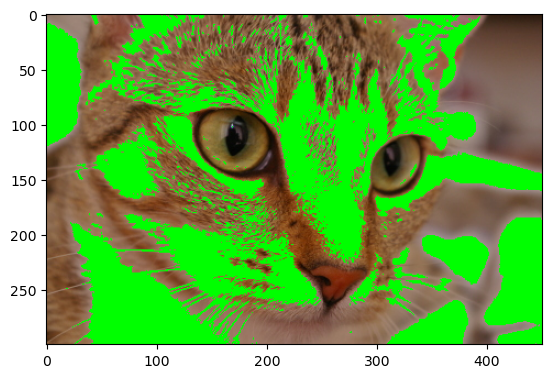

In [35]:
from skimage import data
from matplotlib import pyplot as plt

cat = data.chelsea()
reddish = cat[:, :, 0] > 160
cat[reddish] = [0, 255, 0]
plt.imshow(cat)

## Coordinate Conventions
